<a href="https://colab.research.google.com/github/Alan-Yeger/TP_Chona_Netflix/blob/main/Trabajo_Pr%C3%A1ctico_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importamos las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import heapq

In [ ]:
#Leemos el csv y lo guardamos en una variable
df = pd.read_csv (r'NetflixHistory.csv')
print (df)

       Unnamed: 0 Profile Name           Start Time  Duration Attributes  \
0               0        Chona  2022-08-21 19:54:53  00:02:54        NaN   
1               1        Chona  2022-08-21 19:33:17  00:21:33        NaN   
2               2        Chona  2022-08-21 19:11:40  00:21:28        NaN   
3               3        Chona  2022-08-21 18:50:27  00:20:41        NaN   
4               4        Chona  2022-08-21 18:16:34  00:21:20        NaN   
...           ...          ...                  ...       ...        ...   
12992       12992        Chona  2015-01-08 19:21:21  00:04:09        NaN   
12993       12993        Chona  2015-01-08 19:20:47  00:00:15        NaN   
12994       12994        Chona  2015-01-08 19:18:32  00:00:37        NaN   
12995       12995        Chona  2015-01-08 19:16:45  00:00:18        NaN   
12996       12996        Chona  2015-01-08 19:15:14  00:00:18        NaN   

                                                   Title  \
0      Community: Temporada

##Ignorar dispositivos

In [ ]:
#Creamos una función que te devuelve los dispositivos de Chona
def distintoChona(disp):
  return disp not in ['Sony PS4', 'Netflix Windows App - Cadmium Windows Mobile', 'Apple iPhone 6s', 'Apple iPhone 7 Plus (CDMA)', 'Chrome PC (Cadmium)', 'Samsung 2015 NT14M DTV Smart TV', 'iPhone 5S GSM', 'Google Chromecast V3 Streaming Stick']

In [ ]:
#Le aplicamos la función al dataFrame
df = df[df['Device Type'].apply(distintoChona)]
df

,Unnamed: 0,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,0,Chona,2022-08-21 19:54:53,00:02:54,NaN,Community: Temporada 3: Teoría del caos correc...,NaN,Apple Apple TV 4 Apple TV,00:02:55,00:02:55,AR (Argentina)
1,1,Chona,2022-08-21 19:33:17,00:21:33,NaN,Community: Temporada 3: Ecología competitiva (...,NaN,Apple Apple TV 4 Apple TV,00:21:33,00:21:33,AR (Argentina)
2,2,Chona,2022-08-21 19:11:40,00:21:28,NaN,Community: Temporada 3: Geografía del conflict...,NaN,Apple Apple TV 4 Apple TV,00:21:28,00:21:28,AR (Argentina)
3,3,Chona,2022-08-21 18:50:27,00:20:41,NaN,Community: Temporada 2: Intermediate Documenta...,NaN,Apple Apple TV 4 Apple TV,00:21:02,00:21:02,AR (Argentina)
4,4,Chona,2022-08-21 18:16:34,00:21:20,NaN,Community: Temporada 3: El documental (Capítul...,NaN,Apple Apple TV 4 Apple TV,00:21:21,00:21:21,AR (Argentina)
...,...,...,...,...,...,...,...,...,...,...,...
12992,12992,Chona,2015-01-08 19:21:21,00:04:09,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:04:40,Not latest view,AR (Argentina)
12993,12993,Chona,2015-01-08 19:20:47,00:00:15,NaN,Lost: Temporada 1: Nacida para correr (Capítul...,NaN,Apple TV 3 (revised),00:00:14,Not latest view,AR (Argentina)
12994,12994,Chona,2015-01-08 19:18:32,00:00:37,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:00:37,Not latest view,AR (Argentina)
12995,12995,Chona,2015-01-08 19:16:45,00:00:18,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:00:18,Not latest view,AR (Argentina)


##A)

In [ ]:
#Contamos la cantidad de veces que aparece cada dispositivo
masUsado= df['Device Type'].value_counts()
masUsado

Apple Apple TV 4 Apple TV                         3519
Apple TV 3 (revised)                              1216
Netflix Chrome MAC (Cadmium) HTML 5                449
Safari MAC (Cadmium)                               270
Apple iPhone 4S                                    259
Apple iPod Touch 5G                                220
Wii Bowser                                          99
LG 2016 LG M16 STD RGBW UHD TV Smart TV             91
Apple iPad 3                                        73
Apple iPhone 11 Pro                                 39
LG 2016 MStar M2 Low DTV Smart TV                   39
Apple iPad 3rd Gen (Wi-Fi Only) iPad                12
LG 2017 LG M16p Standard UHD TV Smart TV             3
Apple iPhone 13 Mini                                 1
Android DefaultWidevineL3Tablet Android Tablet       1
Name: Device Type, dtype: int64

In [ ]:
#Tomamos y mostramos el dispositivo más usado
print('El dispositivo más usado es', masUsado.idxmax())

El dispositivo más usado es Apple Apple TV 4 Apple TV


##B)

In [ ]:
#Para saber si una película es película o una serie es serie, lo que hacemos con esta función es primero descartar los Trailers, Clips, etc.
#y luego nos fijamos cuántas veces aparecen los 2 puntos. Si aparecen menos de 2 veces, entonces es una película, y si aparece más,
#entonces es una serie. Esta función la vamos a usar varias veces.
def esPeli(pelis):
  if ('hook') in pelis or ('Tráiler') in pelis or ('Clip') in pelis:
    return False
  numero = 0
  for char in pelis:
    if char == ":":
     numero += 1
  if numero >= 2:
    return False
  return True

#Aplicamos la función a los títulos         
dfPelis = df[df['Title'].apply(esPeli)]

#Mostramos las pelis con más ocurrencias y vemos que son 2
dfPelis['Title'].value_counts()

El código enigma                           7
Star Wars: El Imperio contraataca          7
¿Qué pasó ayer?                            6
007 Operación Skyfall                      6
Regreso al futuro                          5
                                          ..
Aceptados                                  1
Jurassic World: Mundo Jurásico             1
Desnudo                                    1
Bruno y Botas: Tírense a la piscina        1
Mighty Morphin Power Rangers: The Movie    1
Name: Title, Length: 180, dtype: int64

In [ ]:
#Mostramos las primeras 2 pelis, que son las más ocurrentes
print('Las pelis más vistas son:', dfPelis['Title'].value_counts().index[0], 'y', dfPelis['Title'].value_counts().index[1])

Las pelis más vistas son: El código enigma y Star Wars: El Imperio contraataca


In [ ]:
#Esta función la utilizamos para cambiar el formato de Horas-Minutos-Segundos a segundos, lo que hacemos es splitear la duración cuando se encuentra con 
# unos ':' y así podemos tomar las horas mins y segs individualmente y convertirlos por separado a segundos para luego sumarlos a una variable
def cant_segundos(duracion):
  tiempo_segundos = 0
  hor_min_seg = str(duracion).split(':')
  horas= int(hor_min_seg[0])
  minutos = int(hor_min_seg[1])
  segundos = int(hor_min_seg[2])
  tiempo_segundos += horas * 3600
  tiempo_segundos += minutos * 60
  tiempo_segundos += segundos
  return tiempo_segundos

#Creamos un dataFrame con las películas y una lista con los títulos de las mismas
dfPelis = df[df['Title'].apply(esPeli)]

titulos = dfPelis['Title']

#Hacemos una lista con las duraciones en segundos
duraciones = dfPelis ['Duration'].apply(cant_segundos)

#Creamos 2 diccionarios; uno va a contener las duraciones y el otro va a tener los títulos
d_todo ={}
d_duraciones ={}


#Al diccionario le agregamos todas las duraciones
count = 0
for duracion in duraciones:
  d_duraciones[count] = duracion
  count +=1

#ESTAMOS MUY ORGULLOSOS DE ESTO
#Nos fijamos si el título existe en el diccionario. Si no existe, el título se agrega al diccionario con su duración correspondiente
# y si existe, esto significa que no necesitamos agregarlo al diccionario así que simplemente sumamos la duración
count = 0
for titulo in titulos:
  if not titulo in d_todo:
    d_todo[titulo] = d_duraciones[count]
  else:
    d_todo[titulo] += d_duraciones[count]
  count += 1
        
#Ordenamos el diccionario de mayor a menor
d_todo_ordenado = sorted(d_todo.items(), key=lambda x: x[1], reverse=True)

#Mostramos la película con mayor duración total
print("La peli con mayor duración total es:", d_todo_ordenado[0])

La peli con mayor duración total es: ('Star Wars: El Imperio contraataca', 29433)


##C)

In [ ]:
#Este N define la cantidad de series de nuestro top
N = 10

#Similar a esPeli, esta función descarta tráilers y clips y luego se fija la cantidad de ':' solo que ahora devuelve True si hay más de 2
def esSerie(series):
  if ('hook') in series or ('Tráiler') in series or ('Clip') in series:
    return False
  numero = 0
  for char in series:
    if char == ":":
     numero += 1
  if numero >= 2:
    return True
  return False

#Aplicamos esSerie a los títulos
dfSeries = df[df['Title'].apply(esSerie)]

In [ ]:
#Para obtener los nombres de las series, sin importar los capítulos spliteamos los títulos cuando aparece un ':' y tomamos el primer valor
#Aclaración: Esto lo hacemos debido a que notamos que los títulos de las series cumplen con el siguiente formato: NOMBRE DE LA SERIE: TEMPORADA: ...
def separarSeries (series):
  nombreSerie = str(series).split(':')
  return nombreSerie[0]

#Creamos un dataFrame con las series y una lista con los títulos de las mismas
dfSeries = df[df['Title'].apply(esSerie)]

#Separamos los títulos por nombre de serie
titulos = dfSeries['Title'].apply(separarSeries)

#Hacemos una lista con las duraciones en segundos
duraciones = dfSeries ['Duration'].apply(cant_segundos)

#Creamos 2 diccionarios; uno va a contener las duraciones y el otro va a tener los títulos
d_todo ={}
d_duraciones ={}


#Al diccionario le agregamos todas las duraciones
count = 0
for duracion in duraciones:
  d_duraciones[count] = duracion
  count +=1

#Nos fijamos si el título existe en el diccionario. Si no existe, el título se agrega al diccionario con su duración correspondiente
# y si existe, esto significa que no necesitamos agregarlo al diccionario así que simplemente sumamos la duración
count = 0
for titulo in titulos:
  if not titulo in d_todo:
    d_todo[titulo] = d_duraciones[count]
  else:
    d_todo[titulo] += d_duraciones[count]
  count += 1
        
#Ordenamos el diccionario de mayor a menor
d_todo_ordenado = sorted(d_todo.items(), key=lambda x: x[1], reverse=True)

#Creamos nuestra lista que va a contener el TOP
topSeriesTiempo = []

#Appendeamos los primeros N valores a la lista
count = 0
while count < N:
  topSeriesTiempo.append(d_todo_ordenado[count])
  count+=1

#Mostramos el TOP
print('El top', N, 'de series vistas por tiempo:')
topSeriesTiempo

El top 10 de series vistas por tiempo:


[('Cómo conocí a tu madre', 816931),
 ('Community', 807438),
 ('Friends', 690936),
 ('La ley de los audaces', 637377),
 ('Doctor Who', 530325),
 ('Dr. House', 485376),
 ('Brooklyn Nine-Nine', 306755),
 ('Lost', 262502),
 ('Two and a Half Men', 235533),
 ('Breaking Bad', 202188)]

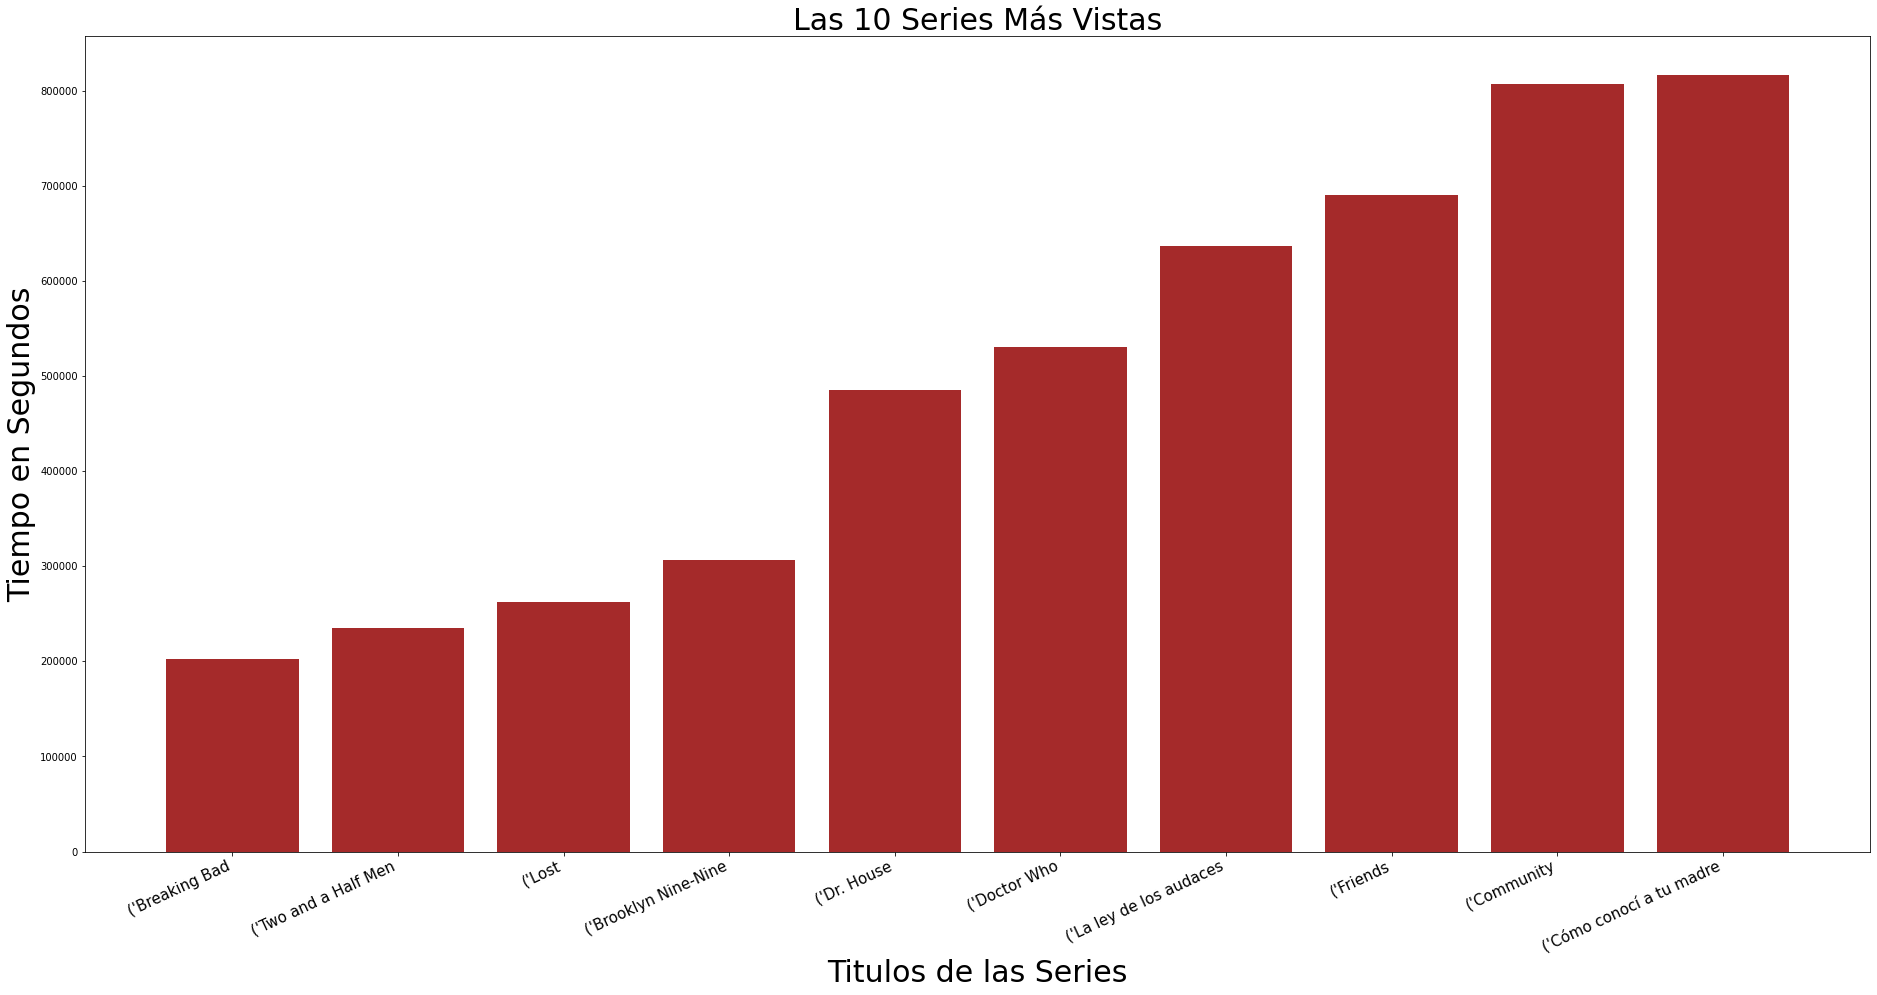

In [ ]:
#Creamos 2 listas en las cuales se almacenarán los títulos y el tiempo en segundos de las 10 series más vistas
SeriesTiempoTitulos = []
SeriesTiempoSegundos = []
#Entramos a un bucle de la cantidad de series a analizar en donde separaremos los títulos de los segundos
for i in topSeriesTiempo:
  variable = str(i).split("',") #Separamos donde hay un apostrofe y una coma, es decir, donde termina el nombre de la serie, capítulo, etc
  SeriesTiempoTitulos.append(variable[0]) #Apendeamos los títulos en la primera lista
  variable2 = str(variable[1]).split(')') #Separamos para que los segundos queden solos y así convertirlos en un int para que en el gráfico aparezca el 0 y se vea mejor
  SeriesTiempoSegundos.append(int(variable2[0])) #Finalmente, apendeamos el número como int a la lista de segundos

SeriesTiempoSegundos = SeriesTiempoSegundos[::-1] #Invertimos los valores del array para que se vea mejor el gráfico
SeriesTiempoTitulos = SeriesTiempoTitulos[::-1] #Invertimos los títulos del array para que coincidan con los valores

plt.figure(figsize=(32, 15)) #Cambiamos el tamaño del gráfico
plt.bar(SeriesTiempoTitulos, SeriesTiempoSegundos, color="brown") #Le pasamos los valores

# Ponemos diferentes labels para entender mejor el gráifco 
plt.xlabel('Titulos de las Series', fontsize=30) 
plt.ylabel('Tiempo en Segundos', fontsize=30) 
plt.title('Las '+ str(N) + ' Series Más Vistas', fontsize=30)

plt.xticks( #Rotamos los titulos para que no se sobrepongan y pasamos un par más de parametros para que el texto se vea correctamente
    rotation=25, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='15'
)
#Por último, lo mostramos 
plt.show()

In [ ]:
#Contamos la cantidad de veces que aparece cada título
cantSeries = titulos.value_counts()

#Creamos la lista que va a contener el TOP
topSeriesOcurrencias = []

#Appendeamos los primeros N valores a la lista
count = 0
for i in cantSeries.items():
  topSeriesOcurrencias.append(i)
  count +=1
  if count == N:
   break

#Mostramos el TOP
print('El top', N, 'de series vistas por cantidad de ocurrencias:')
topSeriesOcurrencias

El top 10 de series vistas por cantidad de ocurrencias:


[('Community', 870),
 ('Cómo conocí a tu madre', 780),
 ('Friends', 604),
 ('Dr. House', 346),
 ('La ley de los audaces', 330),
 ('Brooklyn Nine-Nine', 314),
 ('Doctor Who', 279),
 ('Two and a Half Men', 229),
 ("That '70s Show", 170),
 ('Lost', 123)]

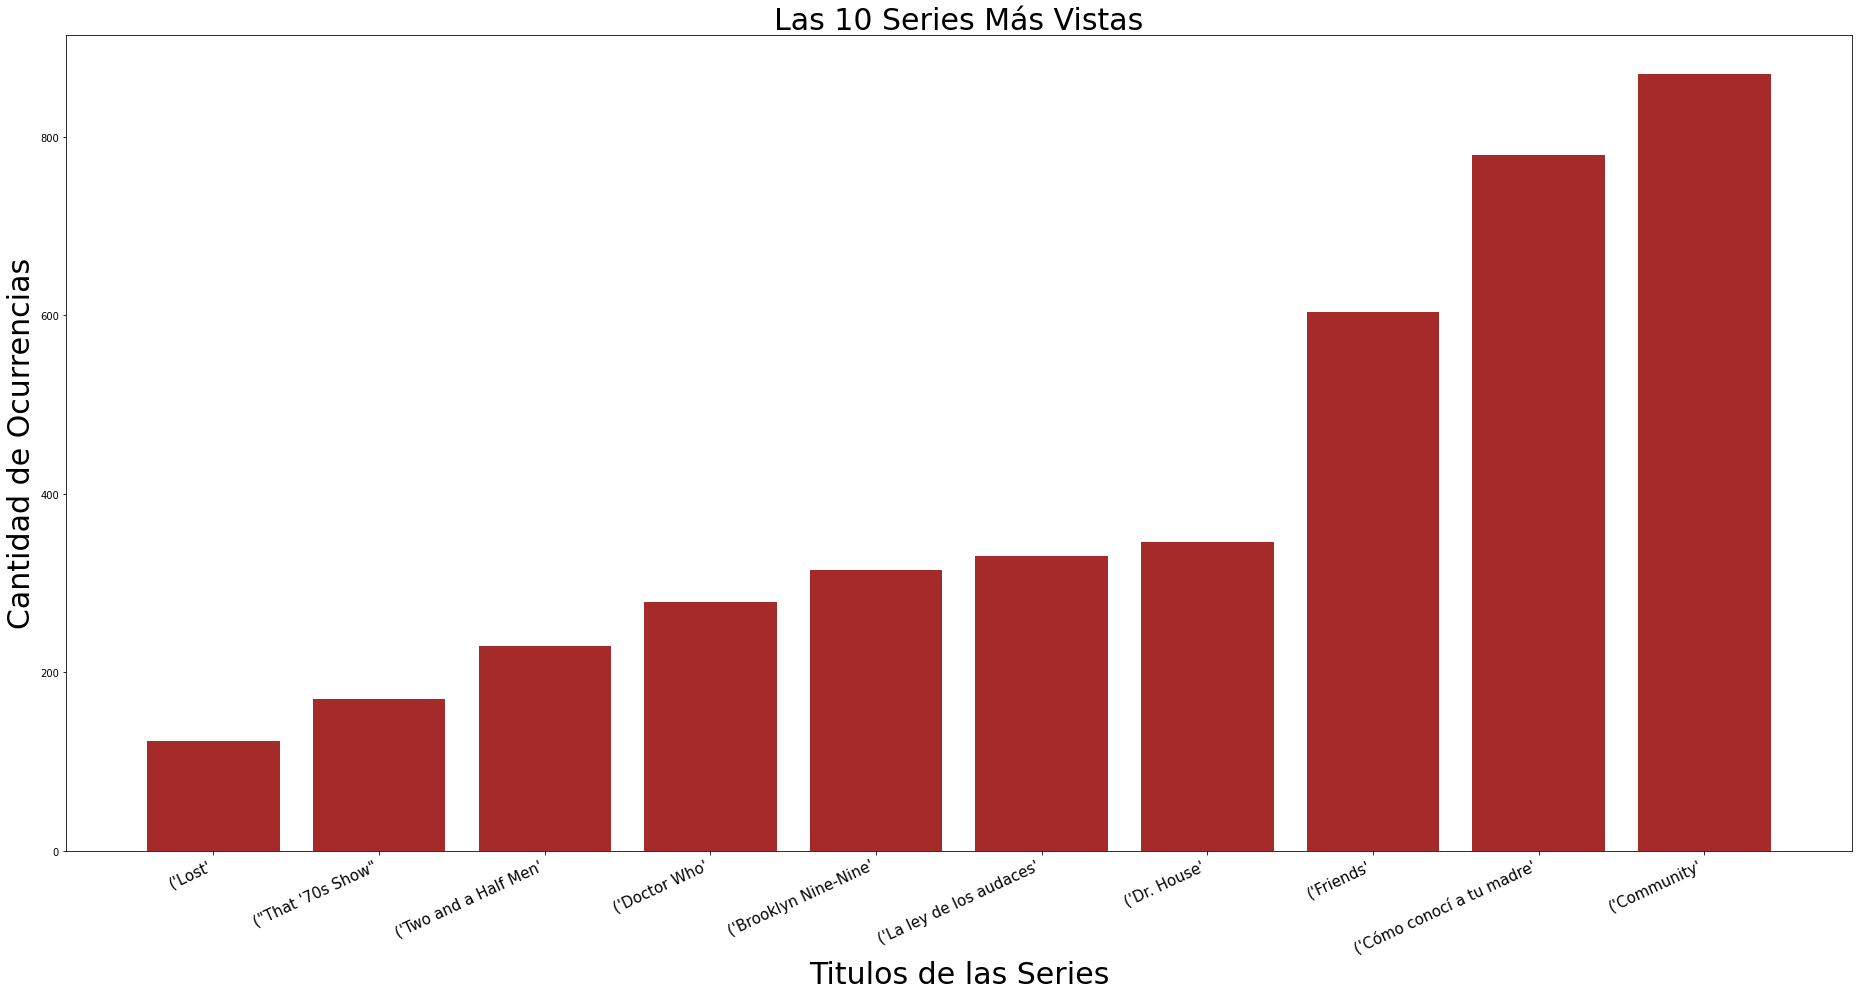

In [ ]:
#Creamos 2 listas en las cuales se almacenarán los títulos y ocurrencias de las 10 series más vistas
SeriesOcurrenciasTitulos = []
SeriesOcurrencias = []
#Entramos a un bucle de la cantidad de series a analizar en donde separaremos los títulos de las ocurrencias
for i in topSeriesOcurrencias:
  variable = str(i).split(",") #Separamos donde hay una coma, es decir, donde termina el nombre de la serie, capítulo, etc
  SeriesOcurrenciasTitulos.append(variable[0]) #Apendeamos los títulos
  variable2 = str(variable[1]).split(')') #Separamos para que la ocurrencia quede sola para que en el gráfico aparezca el 0 y se vea mejor
  SeriesOcurrencias.append(int(variable2[0])) #Finalmente, aprendeamos el número a la lista de ocurrencias

SeriesOcurrencias = SeriesOcurrencias[::-1] #Invertimos los valores del array para que se vea mejor el gráfico
SeriesOcurrenciasTitulos = SeriesOcurrenciasTitulos[::-1] #Invertimos los títulos del array para que coincidan con los valores

plt.figure(figsize=(32, 15)) #Cambiamos el tamaño del gráfico
plt.bar(SeriesOcurrenciasTitulos, SeriesOcurrencias, color="brown") #Le pasamos los valores

# Ponemos diferentes labels para entender mejor el gráifco 
plt.xlabel('Titulos de las Series', fontsize=30) 
plt.ylabel('Cantidad de Ocurrencias', fontsize=30) 
plt.title('Las '+ str(N) + ' Series Más Vistas',  fontsize=30)

plt.xticks( #Rotamos los titulos para que no se sobrepongan y pasamos un par más de parametros para que el texto se vea correctamente
    rotation=25,
    horizontalalignment='right',
    fontweight='light',
    fontsize='15'
)
#Por último, lo mostramos 
plt.show()

##D)

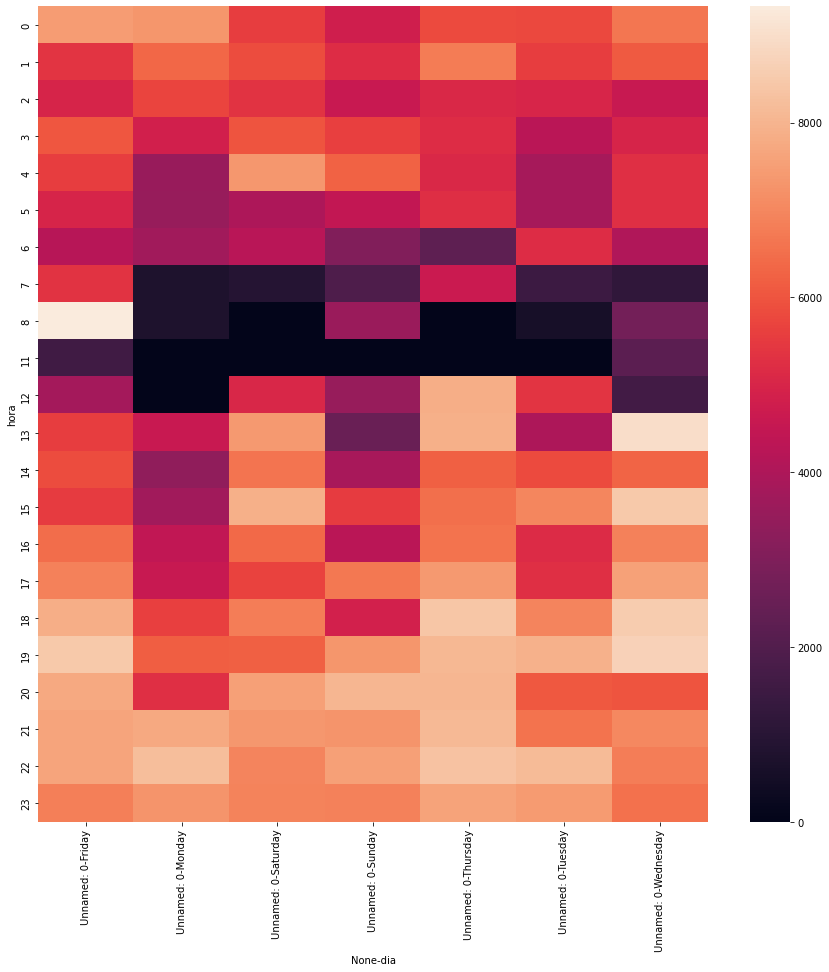

In [ ]:
#Esta función nos permite pasar del formato año-mes-dia a simplemente el día de la semana
def obtenerDias (dias):
  año_mes_dia = dias[0:11]
  return pd.Timestamp(año_mes_dia).day_name()

#Esta función nos permite obtener un int con la hora en la que se vio cada título
def obtenerHoras (horas):
  hora = horas[11:13]
  return int(hora)

#Almacenamos los días y las horas
dia = df['Start Time'].apply(obtenerDias)
hora = df['Start Time'].apply(obtenerHoras)

#Añadimos las columnas dia y hora con los valores obtenidos al dataFrame para poder leerlos en el heatmap
df['dia'] = dia.values
df['hora'] = hora.values

#Creamos el Heatmap a partir de los valores
dfHeatmap = pd.pivot_table(df,index=["hora"], columns=["dia"], fill_value=0)
plt.figure(figsize=(15,15))
sns.heatmap(dfHeatmap)

##E

In [ ]:
#Para separar los años, notamos que en Start Time primero aparece el año y luego se separa por un guion
#así que separamos los Start time cuando aparece el guion y tomamos solo la primera parte
def separar_años(serie):
  años = 0
  separarString = serie.split('-')
  años = separarString[0]
  return años

#Aplicamos la función al dataFrame
años = df['Start Time'].apply(separar_años)

#Creamos las listas que nos van a servir para gráficar los años y la cantidad de títulos por año
lista_años = []
lista_cantidad= []
l = 0
i = 2015

#Contamos todos los títulos entre el 2015 y el 2022 y los mostramos
while i <= 2022:
  print('Títulos vistos en el año', i, ':', años.value_counts()[str(i)])
  lista_cantidad.append(años.value_counts()[str(i)])
  lista_años.append(i)
  i += 1
  l +=1


Títulos vistos en el año 2015 : 1191
Títulos vistos en el año 2016 : 807
Títulos vistos en el año 2017 : 795
Títulos vistos en el año 2018 : 916
Títulos vistos en el año 2019 : 550
Títulos vistos en el año 2020 : 1016
Títulos vistos en el año 2021 : 722
Títulos vistos en el año 2022 : 294


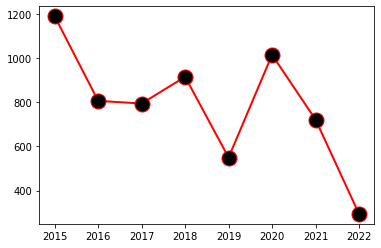

In [ ]:
#Para crear el gráfico le pasamos los años en el eje x y la cantidad de títulos vistos por años en el eje y
plt.plot(lista_años, lista_cantidad,
color='red',
linestyle ='solid',
linewidth = 2,
marker = 'o',
markerfacecolor='black',
markersize =15)

##F

In [ ]:
#Convertimos las duracion del dataFrame a segundos
segundos = df['Duration'].apply(cant_segundos)

#Sumamos todos los segundos de visualización
totalSegundos = sum(segundos)

#Dividimos la cantidad de segundos por 86400, ya que esa es la cantidad de segundos en un día
totalDias = int(totalSegundos / 86400)



In [ ]:
print('Total de días de todos los títulos reproducidos:', totalDias)

Total de días de todos los títulos reproducidos: 99


#Bonus 1

In [ ]:
#Para saber si una película es Star Wars, simplemente nos fijamos si contiene 'Star Wars:' en el título
def starWars(peli):
  if "Star Wars:" in peli:
    return True
  return False

#Primero separamos las pelis ya que hay series de Star Wars
dfPelis = df[df["Title"].apply(esPeli)]

#Luego nos fijamos las pelis que se llaman Star Wars
dfStarWars = dfPelis[dfPelis['Title'].apply(starWars)]

#Guardamos las duraciones de las películas de Star Wars en segundos
duraciones = dfStarWars['Duration'].apply(cant_segundos)

#Tomamos los títulos de Star Wars y los almacenamos en una variable
titulos = dfStarWars['Title']

#Creamos 2 diccionarios, uno va a contene las duraciones y el otro todo
d_todo ={}
d_duraciones ={}


#Al diccionario le agregamos todas las duraciones
count = 0
for duracion in duraciones:
  d_duraciones[count] = duracion
  count +=1

#Nos fijamos si el título existe en el diccionario. Si no existe, el título se agrega al diccionario con su duración correspondiente
# y si existe, esto significa que no necesitamos agregarlo al diccionario así que simplemente sumamos la duración
count = 0
for titulo in titulos:
  if not titulo in d_todo:
    d_todo[titulo] = d_duraciones[count]
  else:
    d_todo[titulo] += d_duraciones[count]
  count += 1

#Ordenamos el diccionario de mayor a menor
d_todo_ordenado = sorted(d_todo.items(), key=lambda x: x[1], reverse=True)

#Mostramos la película con mayor duración total
print("La peli de Star Wars con mayor duración total es:", d_todo_ordenado[0])


La peli de Star Wars con mayor duración total es: ('Star Wars: El Imperio contraataca', 29433)
